# Breast Cancer data - Model Building

In [447]:
## Reading and cleaning the breast Cancer Dataset.

import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

dff = pd.read_csv(url,sep=",", header=None, index_col=None)

dff1= dff.drop(dff.index[0],axis=1)
dff1.shape

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm

lb= LabelEncoder()
dff1[dff1.columns[0]] = lb.fit_transform(dff1[dff1.columns[0]])

numeric_data = dff1[dff1.columns[1:31]]
target_data = dff1[dff1.columns[0]]

# Checking if data is balanced
target_data.value_counts()

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(numeric_data, target_data,test_size=0.2)



In [448]:
# Linear SVC model

LinearModel = svm.LinearSVC()
LinearModel.fit(x_train, y_train)

y_pred = LinearModel.predict(x_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.svm import SVR

SVMregressor = SVR()

# model accuracy

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9298245614035088
[[66  6]
 [ 2 40]]


/Users/chitrapirthyani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [282]:
from sklearn.model_selection import GridSearchCV
# Grid Search to ascertain hyperplane

# Setting tuned parameters for param_grid
parameters = {
    'C': [0.5,1,1.5],
    'loss': ['squared_hinge'],
    'intercept_scaling': [2,3,5],
    'dual': [False],
}
grid_search = GridSearchCV(estimator= LinearModel, param_grid= parameters)

grid_search.fit(x_train, y_train)

#Checking the best parameters.
print('The best parameters are:\n',grid_search.best_params_)

The best parameters are:
 {'C': 1, 'dual': False, 'intercept_scaling': 2, 'loss': 'squared_hinge'}


In [296]:
# Linear SVC Model - Grid Search

GridLinearModel = svm.LinearSVC(C=1,dual=False,random_state=5,intercept_scaling=2)

GridLinearModel.fit(x_train, y_train)

GridLM_ypred = GridLinearModel.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, GridLM_ypred))
print(confusion_matrix(y_test, GridLM_ypred))

print("\nAs we can clearly see, after utilising the Grid Search HyperPlane parameters, the accuracy jumps 20%")

Accuracy: 0.956140350877193
[[68  2]
 [ 3 41]]

As we can clearly see, after utilising the Grid Search HyperPlane parameters, the accuracy jumps 20%


In [285]:
# Polynomial SVC

PolyModel = svm.SVC(kernel='poly', degree=3,max_iter=100 )

PolyModel.fit(x_train, y_train)

Poly_ypred = PolyModel.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, Poly_ypred))
print(confusion_matrix(y_test, Poly_ypred))

Accuracy: 0.9298245614035088
[[68  2]
 [ 6 38]]


In [288]:
from sklearn.model_selection import GridSearchCV
# Grid Search to ascertain hyperplane

# Setting tuned parameters for param_grid
parameters = {
    'C': [0.5,1,1.5],
    'max_iter': [100,1000],
    'degree': [2,3,4],
}
grid_search = GridSearchCV(estimator= PolyModel, param_grid= parameters)

grid_search.fit(x_train, y_train)

#Checking the best parameters.
print('The best parameters are:\n',grid_search.best_params_)

The best parameters are:
 {'C': 1.5, 'degree': 2, 'max_iter': 100}


In [295]:
# Poly SVC Model - Grid Search

GridPolyModel = svm.SVC(kernel='poly',C=1.5,degree=3,max_iter=100)

GridPolyModel.fit(x_train, y_train)

GridPoly_ypred = GridPolyModel.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, GridPoly_ypred))
print(confusion_matrix(y_test, GridPoly_ypred))

print("\nAfter applying the GridSearch parameters, the accuracy increases 1%")

Accuracy: 0.9385964912280702
[[68  2]
 [ 5 39]]

After applying the GridSearch parameters, the accuracy increases 1%


In [298]:
# Radial Basis SVC

RbfModel = svm.SVC(kernel='rbf')

RbfModel.fit(x_train, y_train)

Rbf_ypred = RbfModel.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, Rbf_ypred))
print(confusion_matrix(y_test, Rbf_ypred))

Accuracy: 0.9473684210526315
[[69  1]
 [ 5 39]]


In [300]:
# RBF SVC Model - Grid Search

GridRBFModel = svm.SVC(kernel='rbf',C=1,degree=3,max_iter=100)

GridRBFModel.fit(x_train, y_train)

GridRBF_ypred = GridRBFModel.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, GridRBF_ypred))
print(confusion_matrix(y_test, GridRBF_ypred))

print("\nAfter Applying GridSearch parametes, the accuracy remains the same")

Accuracy: 0.9473684210526315
[[69  1]
 [ 5 39]]

After Applying GridSearch parametes, the accuracy remains the same


In [303]:
"""Accuracy of logistic model: 0.9345238095238095

Accuracy of Random Forest Model: 0.9702380952380952

Accuracy of Gradient Boosting Model: 0.9642857142857143
    
Accuracy of Linear SVC Model: 0.956140350877193

Accuracy of Polynomial SVC Model: 0.9385964912280702
    
Accuracy of RBF SVC Model: 0.9473684210526315
    
Although SVC Models perform consistently well, the metrics of the Random Forest model, post performing Grid Search are the best."""
    

'Accuracy of logistic model: 0.9345238095238095\n\nAccuracy of Random Forest Model: 0.9702380952380952\n\nAccuracy of Gradient Boosting Model: 0.9642857142857143\n    \nAccuracy of Linear SVC Model: 0.956140350877193\n\nAccuracy of Polynomial SVC Model: 0.9385964912280702\n    \nAccuracy of RBF SVC Model: 0.9473684210526315\n    \nAlthough SVC Models perform consistently well, the metrics of the Random Forest model, post performing Grid Search are the best.'

In [305]:
import numpy as np
import cartopy.crs as ccrs
import cartopy
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import pandas as pd
from sklearn.datasets import fetch_species_distributions
from sklearn.datasets.species_distributions import construct_grids

# Covid-19 Analysis (Australia)

In [307]:
## For the purpose of highlighting Covid-19 cases, I have chosen to hgihlight the confirmed cases of AUSTRALIA.

df = pd.read_excel(r'/Users/chitrapirthyani/Documents/DSC 540 [Advanced Machine Learning]/Covid19.xlsx')

In [308]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0
1,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0
2,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0
3,Queensland,Australia,-28.0167,153.4000,2020-01-22,0,0,0
4,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0


In [309]:
df.shape

(968, 8)

In [314]:
latlon = np.vstack([df['Lat'], df['Long']]).T

In [114]:
confirmed = np.array([df['Confirmed']])

In [310]:
X = df[df.columns[2:4]]
Y = df[df.columns[5]]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X, Y,test_size=0.2)


In [311]:
train = df.loc[0:774]
test = df.loc[774:]
train

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0
1,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0
2,Northern Territory,Australia,-12.4634,130.8456,2020-01-22,0,0,0
3,Queensland,Australia,-28.0167,153.4000,2020-01-22,0,0,0
4,South Australia,Australia,-34.9285,138.6007,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
770,Northern Territory,Australia,-12.4634,130.8456,2020-04-27,28,0,23
771,Queensland,Australia,-28.0167,153.4000,2020-04-27,1033,6,926
772,South Australia,Australia,-34.9285,138.6007,2020-04-27,438,4,414
773,Tasmania,Australia,-41.4545,145.9707,2020-04-27,214,11,132


In [312]:
import matplotlib.image as mpimg


The plot shows the concentration of Postive Covd-19 cases in the Australia


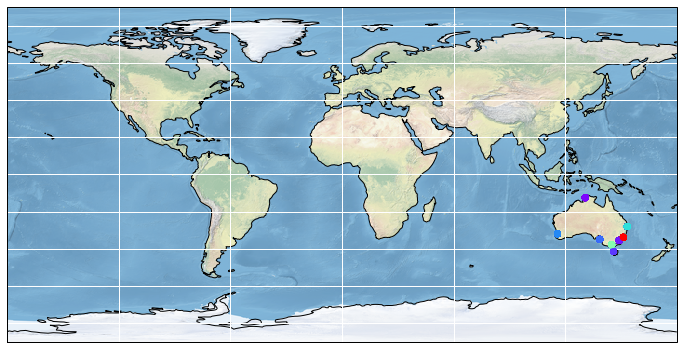

In [328]:
fig = plt.figure(figsize=(12,12))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines() 
ax.gridlines()

# Plot latlon data on the map.
ax.scatter(latlon[:, 1], latlon[:, 0], zorder=3,c=df["Confirmed"], cmap='rainbow');
print("\nThe plot shows the concentration of Postive Covd-19 cases in the Australia")
plt.show()

In [347]:
import numpy as np
import pandas as pd
from ipyleaflet import Map, Marker, Icon, Heatmap

In [330]:
centre = (-25.2743988, 133.7751312)

In [339]:
#draw 2 maps
m3 = Map(center = center, zoom = 10, opacity=0.8)
m4 = Map(center = center, zoom = 10, opacity=0.8)

In [340]:
display(m3)

Map(center=[-31.9505, 115.8605], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [341]:
display(m4)

Map(center=[-31.9505, 115.8605], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [342]:
df1 = df[["Lat","Long","Date"]]
df1.head()

,Lat,Long,Date
0,-35.4735,149.0124,2020-01-22
1,-33.8688,151.2093,2020-01-22
2,-12.4634,130.8456,2020-01-22
3,-28.0167,153.4000,2020-01-22
4,-34.9285,138.6007,2020-01-22


In [343]:
locations = df[['Lat','Long']].to_numpy().tolist()

In [344]:
heatmap = Heatmap(
    locations=locations,
    radius=20
)


In [345]:
m3.add_layer(heatmap)

In [346]:
display(m3)

Map(center=[-31.9505, 115.8605], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

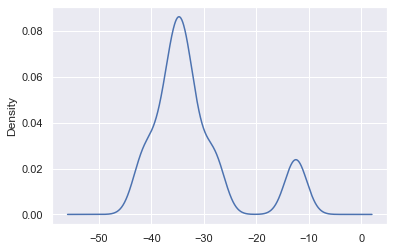

In [348]:
ax1 = df1['Lat'].plot.kde()

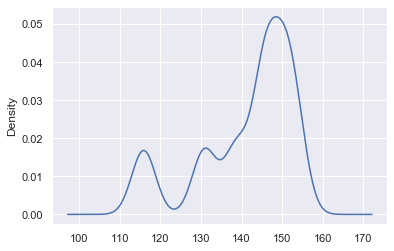

In [349]:
ax2 = df1['Long'].plot.kde()

In [350]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [351]:
df2 = df[["Lat","Long","Date","Confirmed","Deaths", "Recovered"]]
df2.head()

,Lat,Long,Date,Confirmed,Deaths,Recovered
0,-35.4735,149.0124,2020-01-22,0,0,0
1,-33.8688,151.2093,2020-01-22,0,0,0
2,-12.4634,130.8456,2020-01-22,0,0,0
3,-28.0167,153.4000,2020-01-22,0,0,0
4,-34.9285,138.6007,2020-01-22,0,0,0


In [352]:
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [353]:
density_param = {'density': True}

In [354]:
df3 = df[["Confirmed"]]

In [355]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

In [356]:
df3array = df3.to_numpy()


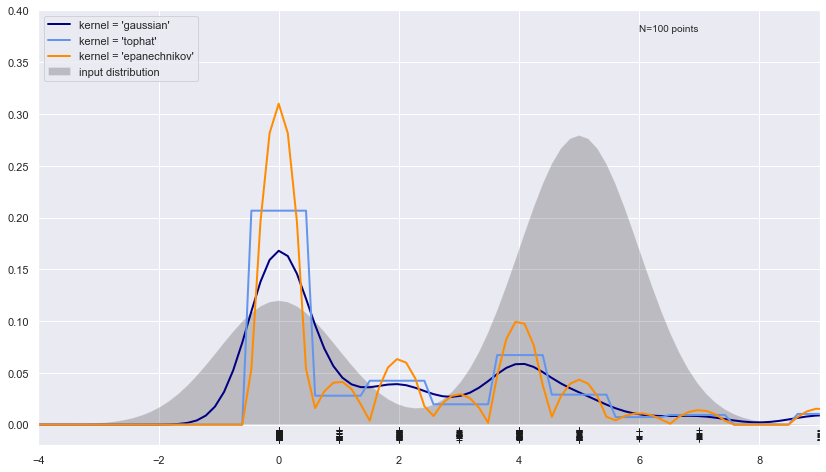

In [379]:
N=100

X_plot = np.linspace(-5, 10, 100)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize=(14,8))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(df3array)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(df3array[:, 0], -0.005 - 0.01 * np.random.random(df3.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

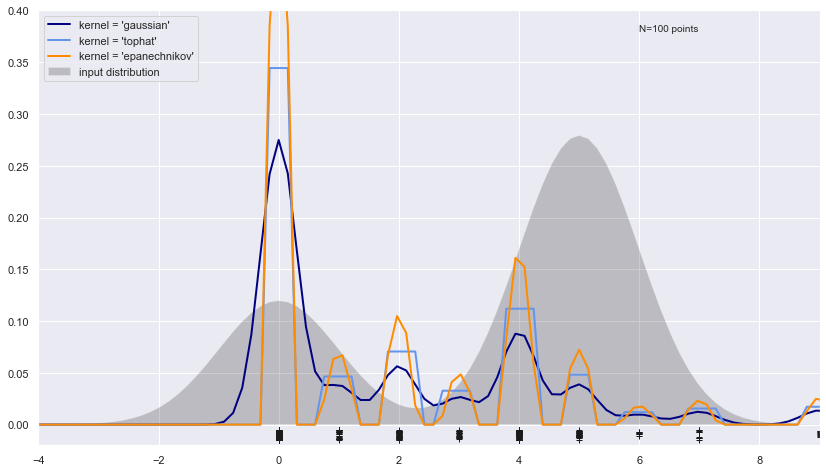

In [378]:
N=100

X_plot = np.linspace(-5, 10, 100)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize=(14,8))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.3).fit(df3array)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(df3array[:, 0], -0.005 - 0.01 * np.random.random(df3.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

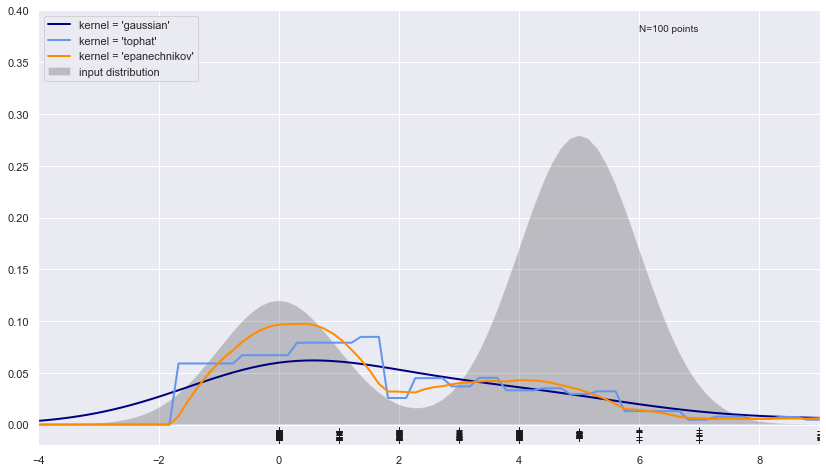

In [377]:
N=100

X_plot = np.linspace(-5, 10, 100)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots(figsize=(14,8))
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=1.75).fit(df3array)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(df3array[:, 0], -0.005 - 0.01 * np.random.random(df3.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

In [380]:
print("After applying all kernel density equations and bandwidths, we can clearly see that with badwidth 0.5, and \n gaussian distribution, the kde is closest to actual input")

After applying all kernel density equations and bandwidths, we can clearly see that with badwidth 0.5, and 
 gaussian distribution, the kde is closest to actual input


# Kernel Ridge Regression

In [381]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.kernel_ridge import KernelRidge

In [416]:
newdata = df[["Lat","Long","Confirmed"]]
newdata1 = df[["Date"]]

In [417]:
X_Confirmed = newdata[["Lat","Long"]]
Y_Confirmed = newdata[["Confirmed"]]
Date_Confirmed = newdata1[["Date"]]

In [433]:
Xtrain_Confirmed = X_Confirmed.loc[300:775]
Xtest_Confirmed = X_Confirmed.loc[775:]
Ytrain_Confirmed = Y_Confirmed.loc[300:775]
Ytest_Confirmed = Y_Confirmed.loc[775:]

Xtrain_Confirmed.shape




(476, 2)

In [434]:
## Support Vector Regression

SVRConfirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=4,C=0.1)
SVRConfirmed.fit(Xtrain_Confirmed,Ytrain_Confirmed)

SVR_pred = SVRConfirmed.predict(Xtest_Confirmed)


/Users/chitrapirthyani/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [441]:
## Calculating Metrics

print('MAE:', mean_absolute_error(SVR_pred, Ytest_Confirmed))
print('MSE:', mean_squared_error(SVR_pred, Ytest_Confirmed))


MAE: 677.9423257947066
MSE: 1140787.9960827446


In [436]:
## Kernel Ridge Regression

KRconfirmed = KernelRidge(alpha=1,kernel='poly',gamma=0.01, degree=4)
KRconfirmed.fit(Xtrain_Confirmed, Ytrain_Confirmed)

KR_pred = KRconfirmed.predict(Xtest_Confirmed)

In [437]:
## Calculating Metrics

print('MAE:', mean_absolute_error(KR_pred, Ytest_Confirmed))
print('MSE:', mean_squared_error(KR_pred, Ytest_Confirmed))


MAE: 479.3150704339378
MSE: 496395.8333204991


In [442]:
"""Removing non integer columns, making predictions only on Confirmed cases and not deaths.
Since Australia got Covid-19 later than several other countries in the dataset, I removed the first 200 rows as 
they have zero confirmed cases. These were the following assumptions I made."""

'Removing non integer columns, making predictions only on Confirmed cases and not deaths.\nSince Australia got Covid-19 later than several other countries in the dataset, I removed the first 200 rows as \nthey have zero confirmed cases. These were the following assumptions I made.'

# Problem 4

In [248]:
"""Equation of the circle - x² + y² = 80, center = 0,0 
The line containing point (0,0) and (1,2) = 
y= 2x

let the points on the circle be (i,a)
i = 2a

i² + a² = 80
(2a)² + a² = 80
5a² = 80
a² = 16
a = 4,-4

i = 8,-8

Therefore the nearest point is (4,8) and the farthest point is (-4,-8)"""



'Equation of the circle - x² + y² = 80, center = 0,0 \nThe line containing point (0,0) and (1,2) = \ny= 2x\n\nlet the points on the circle be (i,a)\ni = 2a\n\ni² + a² = 80\n(2a)² + a² = 80\n5a² = 80\na² = 16\na = 4,-4\n\ni = 8,-8\n\nTherefore the nearest point is (4,8) and the farthest point is (-4,-8)'

In [249]:
def f(x):
   return np.sqrt((x[0] - 3)**2 + (x[1] - 2)**2)

In [253]:
scipy.optimize.minimize(f, np.array([0, 0]), bounds=((-1.5, 1.5), (-1.5, 1.5)))

      fun: 1.5811388300841898
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.94868331, -0.31622778])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 9
      nit: 2
   status: 0
  success: True
        x: array([1.5, 1.5])

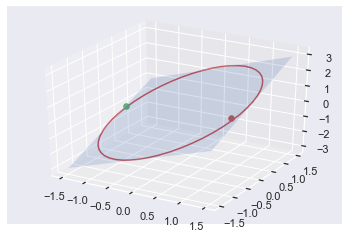

In [405]:
import numpy as np
import scipy

x = np.linspace(-1.5, 1.5)

[X, Y] = np.meshgrid(x, x)

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, X + Y, alpha=0.2, edgecolor='w', cstride=1000,rstride=1000)

theta = np.linspace(0,2*np.pi);
R = 1.5
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)
ax.scatter(X1[0], X1[1], X1[2],s=30 ,c='r')
ax.scatter(X2[0], X2[1], X2[2],s=30 ,c='g')
ax.plot(x1, y1, x1+y1, 'r-')